In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

import statsmodels.api as sm

C:\Users\VEENA\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
from sklearn import tree
from sklearn import preprocessing

In [4]:
employee = pd.read_csv("C:\\Users\\VEENA\\Datasets\\ibm-hr-analytics-employee-attrition-performance\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
employee['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [7]:
min(employee['Age']), max(employee['Age'])

(18, 60)

In [8]:
age = employee['Age']

In [9]:
AgeBracket = ["18-22", "23-27", "28-32", "33-37", "38-42", "43-47", "48-52", "53-57", "58-62"]

In [10]:
AgeBracket[0:5]

['18-22', '23-27', '28-32', '33-37', '38-42']

In [11]:
def age_bracket(age, AgeBracket):
    bracket = []
    for i in range(len(employee)):
        if age[i] >= 18 and age[i] <=22:
            bracket.append(AgeBracket[0])
        elif age[i] >= 23 and age[i] <= 27:
            bracket.append(AgeBracket[1])
        elif age[i] >= 28 and age[i] <= 32:
            bracket.append(AgeBracket[2])
        elif age[i] >= 33 and age[i] <= 37:
            bracket.append(AgeBracket[3])
        elif age[i] >= 38 and age[i] <= 42:
            bracket.append(AgeBracket[4])
        elif age[i] >= 43 and age[i] <= 47:
            bracket.append(AgeBracket[5])
        elif age[i] >= 48 and age[i] <= 52:
            bracket.append(AgeBracket[6])
        elif age[i] >= 53 and age[i] <= 57:
            bracket.append(AgeBracket[7])
        elif age[i] >= 58 and age[i] <= 62:
            bracket.append(AgeBracket[8])
    return bracket
    

In [12]:
bracket = age_bracket(age, AgeBracket)

In [13]:
len(employee), len(bracket)

(1470, 1470)

In [14]:
employee['AgeBracket']=(bracket)

In [15]:
employee.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeBracket
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,38-42
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,48-52
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,33-37
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,33-37
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,23-27
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,80,0,8,2,2,7,7,3,6,28-32
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,80,3,12,3,2,1,0,0,0,58-62
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,80,1,1,2,3,1,0,0,0,28-32
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,80,0,10,2,3,9,7,1,8,38-42
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,80,2,17,3,2,7,7,7,7,33-37


In [16]:
Y = employee['Attrition']
#X = employee.drop(columns = ['Age', 'Attrition', 'DailyRate','BusinessTravel', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'JobRole', 'MonthlyRate', 'Over18', 'WorkLifeBalance'])
#X = employee.drop(columns = ['Age', 'Attrition', 'DailyRate','BusinessTravel', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'JobRole', 'MonthlyRate', 'Over18'])
#X = employee.drop(columns = ['Age', 'Attrition', 'DailyRate','BusinessTravel', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'MonthlyRate', 'Over18'])
#X = employee.drop(columns = ['Age', 'Attrition', 'DailyRate','BusinessTravel', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'MonthlyRate', 'Over18'])
#X = employee.drop(columns = ['Age', 'Attrition', 'DailyRate','BusinessTravel', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear',  'MonthlyRate', 'Over18'])
#X = employee.drop(columns = ['Age', 'Attrition', 'DailyRate', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear',  'YearsInCurrentRole', 'MonthlyRate', 'Over18'])
#X = employee.drop(columns = ['Age', 'Attrition', 'DailyRate', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'StandardHours',  'TrainingTimesLastYear',  'YearsInCurrentRole', 'MonthlyRate', 'Over18'])
X = employee.drop(columns = ['Age', 'Attrition', 'DailyRate', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'YearsInCurrentRole', 'MonthlyRate', 'Over18'])

In [20]:
len(employee[employee['Attrition'].isin(['Yes'])]), len(employee[employee['Attrition'].isin(['No'])])

(237, 1233)

In [17]:
X.head(5)

NameError: name 'X' is not defined

In [18]:
X.columns, len(X.columns)

(Index(['BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
        'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
        'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
        'AgeBracket'],
       dtype='object'), 26)

In [791]:
X['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [21]:
employee['Row'] = range(0, len(employee))

Department = employee['Department'].unique()
New = employee.groupby(['Attrition', 'Department']).count()

In [182]:
New

Age  BusinessTravel  DailyRate  \
Attrition Department                                               
No        Human Resources          51              51         51   
          Research & Development  828             828        828   
          Sales                   354             354        354   
Yes       Human Resources          12              12         12   
          Research & Development  133             133        133   
          Sales                    92              92         92   

                                  DistanceFromHome  Education  EducationField  \
Attrition Department                                                            
No        Human Resources                       51         51              51   
          Research & Development               828        828             828   
          Sales                                354        354             354   
Yes       Human Resources                       12         12              12   
          Research & Development               133        133             133   
          Sales                                 92         92              92   

                                  EmployeeCount  EmployeeNumber  \
Attrition Department                                              
No        Human Resources                    51              51   
          Research & Development            828             828   
          Sales                             354             354   
Yes       Human Resources                    12              12   
          Research & Development            133             133   
          Sales                              92              92   

                                  EnvironmentSatisfaction  Gender ...   \
Attrition Department                                              ...    
No        Human Resources                              51      51 ...    
          Research & Development                      828     828 ...    
          Sales                                       354     354 ...    
Yes       Human Resources                              12      12 ...    
          Research & Development                      133     133 ...    
          Sales                                        92      92 ...    

                                  StockOptionLevel  TotalWorkingYears  \
Attrition Department                                                    
No        Human Resources                       51                 51   
          Research & Development               828                828   
          Sales                                354                354   
Yes       Human Resources                       12                 12   
          Research & Development               133                133   
          Sales                                 92                 92   

                                  TrainingTimesLastYear  WorkLifeBalance  \
Attrition Department                                                       
No        Human Resources                            51               51   
          Research & Development                    828              828   
          Sales                                     354              354   
Yes       Human Resources                            12               12   
          Research & Development                    133              133   
          Sales                                      92               92   

                                  YearsAtCompany  YearsInCurrentRole  \
Attrition Department                                                   
No        Human Resources                     51                  51   
          Research & Development             828                 828   
          Sales                              354                 354   
Yes       Human Resources                     12                  12   
          Research & Development             133                 133   
          Sa

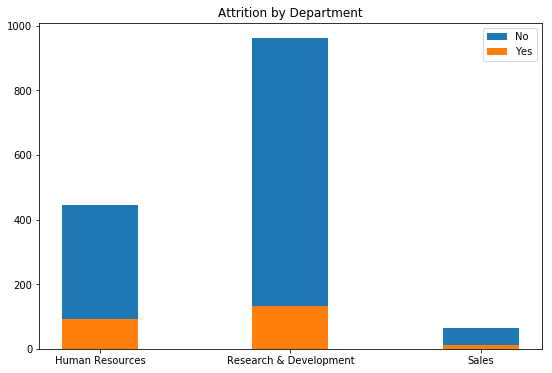

In [183]:

plt.figure(figsize = (9, 6))
plt.title('Attrition by Department')
plt.bar(Department, New['Row'][0:3], bottom = New['Row'][3:6], width = 0.4, label = 'No')
plt.bar(Department, New['Row'][3:6], width = 0.4, label = 'Yes')
plt.legend()


In [184]:
Education = employee['Education'].unique()
New = employee.groupby(['Attrition', 'Education']).count()
New

Age  BusinessTravel  DailyRate  Department  \
Attrition Education                                               
No        1          139             139        139         139   
          2          238             238        238         238   
          3          473             473        473         473   
          4          340             340        340         340   
          5           43              43         43          43   
Yes       1           31              31         31          31   
          2           44              44         44          44   
          3           99              99         99          99   
          4           58              58         58          58   
          5            5               5          5           5   

                     DistanceFromHome  EducationField  EmployeeCount  \
Attrition Education                                                    
No        1                       139             139            139   
          2                       238             238            238   
          3                       473             473            473   
          4                       340             340            340   
          5                        43              43             43   
Yes       1                        31              31             31   
          2                        44              44             44   
          3                        99              99             99   
          4                        58              58             58   
          5                         5               5              5   

                     EmployeeNumber  EnvironmentSatisfaction  Gender ...   \
Attrition Education                                                  ...    
No        1                     139                      139     139 ...    
          2                     238                      238     238 ...    
          3                     473                      473     473 ...    
          4                     340                      340     340 ...    
          5                      43                       43      43 ...    
Yes       1                      31                       31      31 ...    
          2                      44                       44      44 ...    
          3                      99                       99      99 ...    
          4                      58                       58      58 ...    
          5                       5                        5       5 ...    

                     StockOptionLevel  TotalWorkingYears  \
Attrition Education                                        
No        1                       139                139   
          2                       238                238   
          3                       473                473   
          4                       340                340   
          5                        43                 43   
Yes       1                        31                 31   
          2                        44                 44   
          3                        99                 99   
          4                        58                 58   
          5                         5                  5   

                     TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
Attrition Education                                                           
No        1                            139              139             139   
          2                            238              238             238   
          3                            473              473             473   
          4                            340              340             340   
          5                             43               43              43   
Yes       1                             31               31              31   
          2                             44               44              

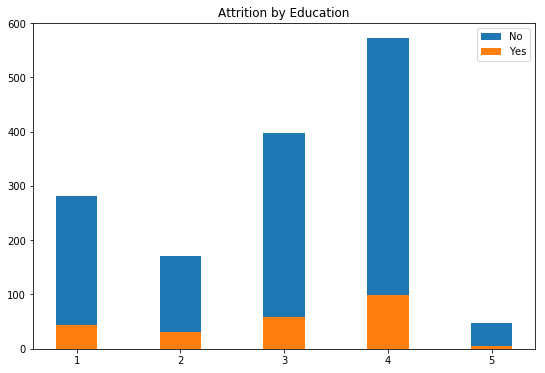

In [185]:
plt.figure(figsize = (9, 6))
plt.title('Attrition by Education')
plt.bar(Education, New['Row'][0:5], bottom = New['Row'][5:10], width = 0.4, label = 'No')
plt.bar(Education, New['Row'][5:10], width = 0.4, label = 'Yes')
plt.legend()

In [186]:
Gender = employee['Gender'].unique()
New = employee.groupby(['Attrition', 'Gender']).count()
New

Age  BusinessTravel  DailyRate  Department  \
Attrition Gender                                               
No        Female  501             501        501         501   
          Male    732             732        732         732   
Yes       Female   87              87         87          87   
          Male    150             150        150         150   

                  DistanceFromHome  Education  EducationField  EmployeeCount  \
Attrition Gender                                                               
No        Female               501        501             501            501   
          Male                 732        732             732            732   
Yes       Female                87         87              87             87   
          Male                 150        150             150            150   

                  EmployeeNumber  EnvironmentSatisfaction ...   \
Attrition Gender                                          ...    
No        Female             501                      501 ...    
          Male               732                      732 ...    
Yes       Female              87                       87 ...    
          Male               150                      150 ...    

                  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
Attrition Gender                                                               
No        Female               501                501                    501   
          Male                 732                732                    732   
Yes       Female                87                 87                     87   
          Male                 150                150                    150   

                  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
Attrition Gender                                                        
No        Female              501             501                 501   
          Male                732             732                 732   
Yes       Female               87              87                  87   
          Male                150             150                 150   

                  YearsSinceLastPromotion  YearsWithCurrManager  AgeBracket  \
Attrition Gender                                                              
No        Female                      501                   501         501   
          Male                        732                   732         732   
Yes       Female                       87                    87          87   
          Male                        150                   150         150   

                  Row  
Attrition Gender       
No        Female  501  
          Male    732  
Yes       Female   87  
          Male    150  

[4 rows x 35 columns]

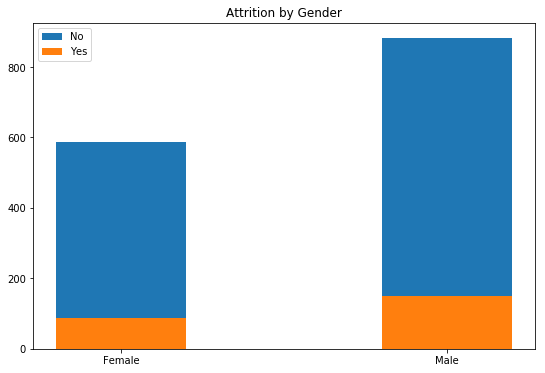

In [187]:
plt.figure(figsize = (9, 6))
plt.title('Attrition by Gender')
plt.bar(Gender, New['Row'][0:2], bottom = New['Row'][2:4], width = 0.4, label = 'No')
plt.bar(Gender, New['Row'][2:4], width = 0.4, label = 'Yes')
plt.legend()

In [188]:
JobInvolve = employee['JobInvolvement'].unique()
New = employee.groupby(['Attrition', 'JobInvolvement']).count()
New

Age  BusinessTravel  DailyRate  Department  \
Attrition JobInvolvement                                               
No        1                55              55         55          55   
          2               304             304        304         304   
          3               743             743        743         743   
          4               131             131        131         131   
Yes       1                28              28         28          28   
          2                71              71         71          71   
          3               125             125        125         125   
          4                13              13         13          13   

                          DistanceFromHome  Education  EducationField  \
Attrition JobInvolvement                                                
No        1                             55         55              55   
          2                            304        304             304   
          3                            743        743             743   
          4                            131        131             131   
Yes       1                             28         28              28   
          2                             71         71              71   
          3                            125        125             125   
          4                             13         13              13   

                          EmployeeCount  EmployeeNumber  \
Attrition JobInvolvement                                  
No        1                          55              55   
          2                         304             304   
          3                         743             743   
          4                         131             131   
Yes       1                          28              28   
          2                          71              71   
          3                         125             125   
          4                          13              13   

                          EnvironmentSatisfaction ...   StockOptionLevel  \
Attrition JobInvolvement                          ...                      
No        1                                    55 ...                 55   
          2                                   304 ...                304   
          3                                   743 ...                743   
          4                                   131 ...                131   
Yes       1                                    28 ...                 28   
          2                                    71 ...                 71   
          3                                   125 ...                125   
          4                                    13 ...                 13   

                          TotalWorkingYears  TrainingTimesLastYear  \
Attrition JobInvolvement                                             
No        1                              55                     55   
          2                             304                    304   
          3                             743                    743   
          4                             131                    131   
Yes       1                              28                     28   
          2                              71                     71   
          3                             125                    125   
          4                              13                     13   

                          WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
Attrition JobInvolvement                                                        
No        1                            55              55                  55   
          2                           304             304                 304   
          3                           743             743                 743   
          4                           131             131                 131   
Yes       1                        

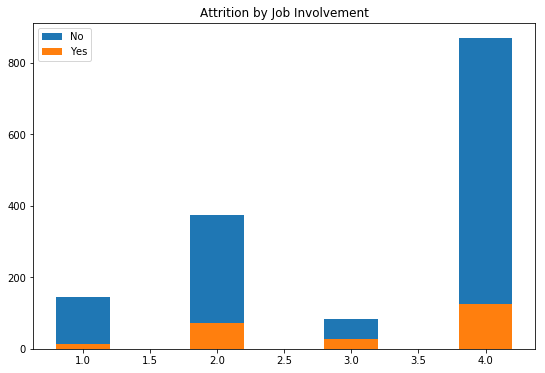

In [189]:
plt.figure(figsize = (9, 6))
plt.title('Attrition by Job Involvement')
plt.bar(JobInvolve, New['Row'][0:4], bottom = New['Row'][4:8], width = 0.4, label = 'No')
plt.bar(JobInvolve, New['Row'][4:8], width = 0.4, label = 'Yes')
plt.legend()

In [190]:
JobLevel = employee['JobLevel'].unique()
New = employee.groupby(['Attrition', 'JobLevel']).count()
New

Age  BusinessTravel  DailyRate  Department  \
Attrition JobLevel                                               
No        1         400             400        400         400   
          2         482             482        482         482   
          3         186             186        186         186   
          4         101             101        101         101   
          5          64              64         64          64   
Yes       1         143             143        143         143   
          2          52              52         52          52   
          3          32              32         32          32   
          4           5               5          5           5   
          5           5               5          5           5   

                    DistanceFromHome  Education  EducationField  \
Attrition JobLevel                                                
No        1                      400        400             400   
          2                      482        482             482   
          3                      186        186             186   
          4                      101        101             101   
          5                       64         64              64   
Yes       1                      143        143             143   
          2                       52         52              52   
          3                       32         32              32   
          4                        5          5               5   
          5                        5          5               5   

                    EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
Attrition JobLevel                                                           
No        1                   400             400                      400   
          2                   482             482                      482   
          3                   186             186                      186   
          4                   101             101                      101   
          5                    64              64                       64   
Yes       1                   143             143                      143   
          2                    52              52                       52   
          3                    32              32                       32   
          4                     5               5                        5   
          5                     5               5                        5   

                   ...   StockOptionLevel  TotalWorkingYears  \
Attrition JobLevel ...                                         
No        1        ...                400                400   
          2        ...                482                482   
          3        ...                186                186   
          4        ...                101                101   
          5        ...                 64                 64   
Yes       1        ...                143                143   
          2        ...                 52                 52   
          3        ...                 32                 32   
          4        ...                  5                  5   
          5        ...                  5                  5   

                    TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
Attrition JobLevel                                                           
No        1                           400              400             400   
          2                           482              482             482   
          3                           186              186             186   
          4                           101              101             101   
          5                            64               64              64   
Yes       1                           143              143             143   
          2                            52               52              52   
          3   

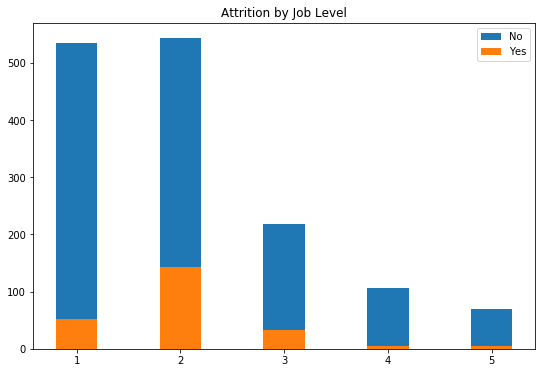

In [191]:
plt.figure(figsize = (9, 6))
plt.title('Attrition by Job Level')
plt.bar(JobLevel, New['Row'][0:5], bottom = New['Row'][5:10], width = 0.4, label = 'No')
plt.bar(JobLevel, New['Row'][5:10], width = 0.4, label = 'Yes')
plt.legend()

In [192]:
JobSatisfy = employee['JobSatisfaction'].unique()
New = employee.groupby(['Attrition', 'JobSatisfaction']).count()
New

Age  BusinessTravel  DailyRate  Department  \
Attrition JobSatisfaction                                               
No        1                223             223        223         223   
          2                234             234        234         234   
          3                369             369        369         369   
          4                407             407        407         407   
Yes       1                 66              66         66          66   
          2                 46              46         46          46   
          3                 73              73         73          73   
          4                 52              52         52          52   

                           DistanceFromHome  Education  EducationField  \
Attrition JobSatisfaction                                                
No        1                             223        223             223   
          2                             234        234             234   
          3                             369        369             369   
          4                             407        407             407   
Yes       1                              66         66              66   
          2                              46         46              46   
          3                              73         73              73   
          4                              52         52              52   

                           EmployeeCount  EmployeeNumber  \
Attrition JobSatisfaction                                  
No        1                          223             223   
          2                          234             234   
          3                          369             369   
          4                          407             407   
Yes       1                           66              66   
          2                           46              46   
          3                           73              73   
          4                           52              52   

                           EnvironmentSatisfaction ...   StockOptionLevel  \
Attrition JobSatisfaction                          ...                      
No        1                                    223 ...                223   
          2                                    234 ...                234   
          3                                    369 ...                369   
          4                                    407 ...                407   
Yes       1                                     66 ...                 66   
          2                                     46 ...                 46   
          3                                     73 ...                 73   
          4                                     52 ...                 52   

                           TotalWorkingYears  TrainingTimesLastYear  \
Attrition JobSatisfaction                                             
No        1                              223                    223   
          2                              234                    234   
          3                              369                    369   
          4                              407                    407   
Yes       1                               66                     66   
          2                               46                     46   
          3                               73                     73   
          4                               52                     52   

                           WorkLifeBalance  YearsAtCompany  \
Attrition JobSatisfaction                                    
No        1                            223             223   
          2                            234             234   
          3                            369             369   
          4                            407             407   
Yes       1                             66              66   
          2                           

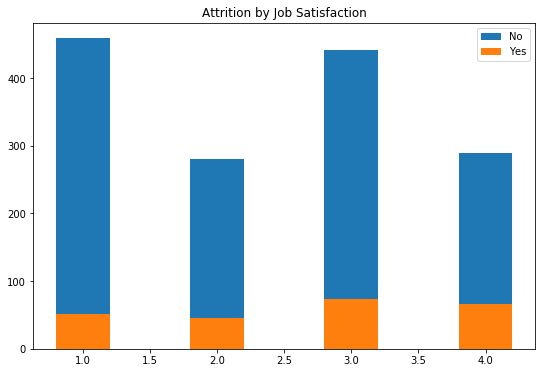

In [193]:
plt.figure(figsize = (9, 6))
plt.title('Attrition by Job Satisfaction')
plt.bar(JobSatisfy, New['Row'][0:4], bottom = New['Row'][4:8], width = 0.4, label = 'No')
plt.bar(JobSatisfy, New['Row'][4:8], width = 0.4, label = 'Yes')
plt.legend()

In [194]:
MaritalStat = employee['MaritalStatus'].unique()
New = employee.groupby(['Attrition', 'MaritalStatus']).count()
New

Age  BusinessTravel  DailyRate  Department  \
Attrition MaritalStatus                                               
No        Divorced       294             294        294         294   
          Married        589             589        589         589   
          Single         350             350        350         350   
Yes       Divorced        33              33         33          33   
          Married         84              84         84          84   
          Single         120             120        120         120   

                         DistanceFromHome  Education  EducationField  \
Attrition MaritalStatus                                                
No        Divorced                    294        294             294   
          Married                     589        589             589   
          Single                      350        350             350   
Yes       Divorced                     33         33              33   
          Married                      84         84              84   
          Single                      120        120             120   

                         EmployeeCount  EmployeeNumber  \
Attrition MaritalStatus                                  
No        Divorced                 294             294   
          Married                  589             589   
          Single                   350             350   
Yes       Divorced                  33              33   
          Married                   84              84   
          Single                   120             120   

                         EnvironmentSatisfaction ...   StockOptionLevel  \
Attrition MaritalStatus                          ...                      
No        Divorced                           294 ...                294   
          Married                            589 ...                589   
          Single                             350 ...                350   
Yes       Divorced                            33 ...                 33   
          Married                             84 ...                 84   
          Single                             120 ...                120   

                         TotalWorkingYears  TrainingTimesLastYear  \
Attrition MaritalStatus                                             
No        Divorced                     294                    294   
          Married                      589                    589   
          Single                       350                    350   
Yes       Divorced                      33                     33   
          Married                       84                     84   
          Single                       120                    120   

                         WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
Attrition MaritalStatus                                                        
No        Divorced                   294             294                 294   
          Married                    589             589                 589   
          Single                     350             350                 350   
Yes       Divorced                    33              33                  33   
          Married                     84              84                  84   
          Single                     120             120                 120   

                         YearsSinceLastPromotion  YearsWithCurrManager  \
Attrition MaritalStatus                                                  
No        Divorced                           294                   294   
          Married                            589                   589   
          Single                             350                   350   
Yes       Divorced                            33                    33   
          Married                             84                    84   
          Single                             120                   120   

                         A

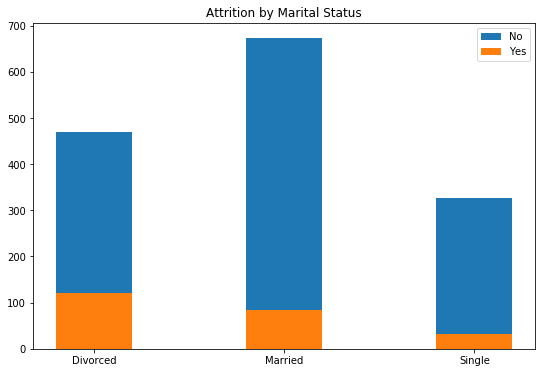

In [195]:
plt.figure(figsize = (9, 6))
plt.title('Attrition by Marital Status')
plt.bar(MaritalStat, New['Row'][0:3], bottom = New['Row'][3:6], width = 0.4, label = 'No')
plt.bar(MaritalStat, New['Row'][3:6], width = 0.4, label = 'Yes')
plt.legend()

In [165]:
AgeBracket = employee['AgeBracket'].unique()
New = employee.groupby(['Attrition', 'AgeBracket']).count()
New

Age  BusinessTravel  DailyRate  Department  \
Attrition AgeBracket                                               
No        18-22        30              30         30          30   
          23-27       121             121        121         121   
          28-32       236             236        236         236   
          33-37       289             289        289         289   
          38-42       222             222        222         222   
          43-47       146             146        146         146   
          48-52        96              96         96          96   
          53-57        69              69         69          69   
          58-62        24              24         24          24   
Yes       18-22        27              27         27          27   
          23-27        32              32         32          32   
          28-32        70              70         70          70   
          33-37        43              43         43          43   
          38-42        21              21         21          21   
          43-47        17              17         17          17   
          48-52        14              14         14          14   
          53-57         8               8          8           8   
          58-62         5               5          5           5   

                      DistanceFromHome  Education  EducationField  \
Attrition AgeBracket                                                
No        18-22                     30         30              30   
          23-27                    121        121             121   
          28-32                    236        236             236   
          33-37                    289        289             289   
          38-42                    222        222             222   
          43-47                    146        146             146   
          48-52                     96         96              96   
          53-57                     69         69              69   
          58-62                     24         24              24   
Yes       18-22                     27         27              27   
          23-27                     32         32              32   
          28-32                     70         70              70   
          33-37                     43         43              43   
          38-42                     21         21              21   
          43-47                     17         17              17   
          48-52                     14         14              14   
          53-57                      8          8               8   
          58-62                      5          5               5   

                      EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
Attrition AgeBracket                                                           
No        18-22                  30              30                       30   
          23-27                 121             121                      121   
          28-32                 236             236                      236   
          33-37                 289             289                      289   
          38-42                 222             222                      222   
          43-47                 146             146                      146   
          48-52                  96              96                       96   
          53-57                  69              69                       69   
          58-62                  24              24                       24   
Yes       18-22                  27              27                       27   
          23-27                  32              32                       32   
          28-32                  70              70                       70   
          33-37                  43              43                       43   
          38-42                  21              21                       21   


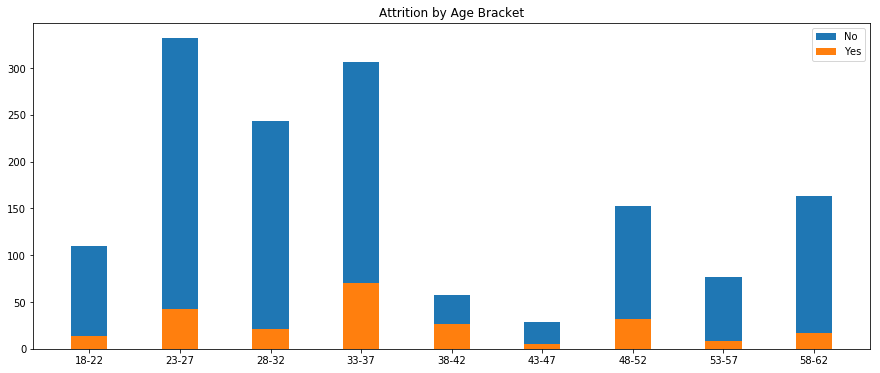

In [180]:
plt.figure(figsize = (15, 6))
plt.title('Attrition by Age Bracket')
plt.bar(AgeBracket, New['Row'][0:9], bottom=New['Row'][9:18], width = 0.4, label = 'No')
plt.bar(AgeBracket, New['Row'][9:18], width = 0.4, label = 'Yes')
plt.legend()

In [167]:
# From raw value to percentage
totals = [i+j for i,j in zip(New['Row'][0:9], New['Row'][9:18])]
No = [i / j * 100 for i,j in zip(New['Row'][0:9], totals)]
Yes = [i / j * 100 for i,j in zip(New['Row'][9:18], totals)]


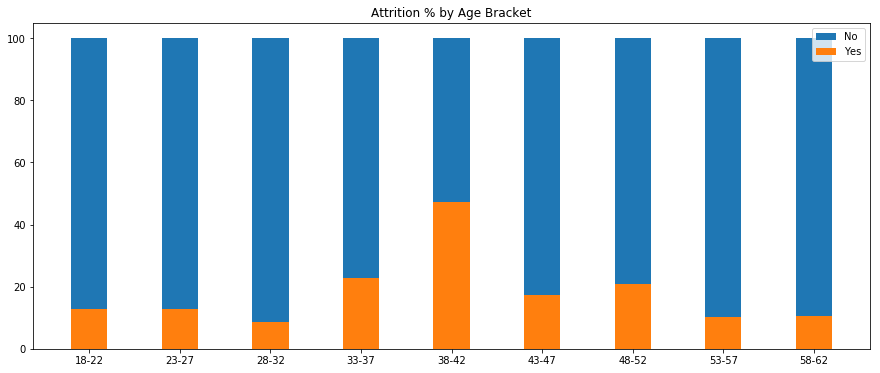

In [173]:
plt.figure(figsize = (15, 6))
plt.title('Attrition % by Age Bracket')
plt.bar(AgeBracket, No, bottom=Yes, width = 0.4, label = 'No')
plt.bar(AgeBracket, Yes, width = 0.4, label = 'Yes')
plt.legend()

In [196]:
OverTime = employee['OverTime'].unique()
New = employee.groupby(['Attrition', 'OverTime']).count()
New

Age  BusinessTravel  DailyRate  Department  \
Attrition OverTime                                               
No        No        944             944        944         944   
          Yes       289             289        289         289   
Yes       No        110             110        110         110   
          Yes       127             127        127         127   

                    DistanceFromHome  Education  EducationField  \
Attrition OverTime                                                
No        No                     944        944             944   
          Yes                    289        289             289   
Yes       No                     110        110             110   
          Yes                    127        127             127   

                    EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
Attrition OverTime                                                           
No        No                  944             944                      944   
          Yes                 289             289                      289   
Yes       No                  110             110                      110   
          Yes                 127             127                      127   

                   ...   StockOptionLevel  TotalWorkingYears  \
Attrition OverTime ...                                         
No        No       ...                944                944   
          Yes      ...                289                289   
Yes       No       ...                110                110   
          Yes      ...                127                127   

                    TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
Attrition OverTime                                                           
No        No                          944              944             944   
          Yes                         289              289             289   
Yes       No                          110              110             110   
          Yes                         127              127             127   

                    YearsInCurrentRole  YearsSinceLastPromotion  \
Attrition OverTime                                                
No        No                       944                      944   
          Yes                      289                      289   
Yes       No                       110                      110   
          Yes                      127                      127   

                    YearsWithCurrManager  AgeBracket  Row  
Attrition OverTime                                         
No        No                         944         944  944  
          Yes                        289         289  289  
Yes       No                         110         110  110  
          Yes                        127         127  127  

[4 rows x 35 columns]

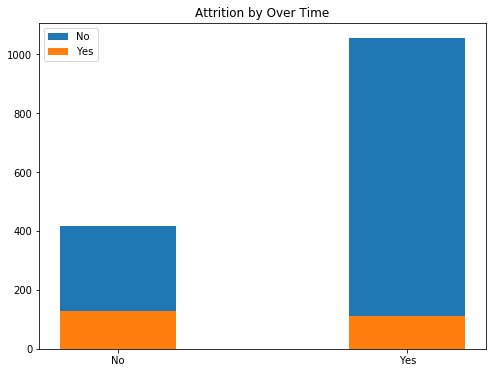

In [197]:
plt.figure(figsize = (8, 6))
plt.title('Attrition by Over Time')
plt.bar(OverTime, New['Row'][0:2], bottom = New['Row'][2:4], width = 0.4, label = 'No')
plt.bar(OverTime, New['Row'][2:4], width = 0.4, label = 'Yes')
plt.legend()

In [198]:
PerformRate = employee['PerformanceRating'].unique()
New = employee.groupby(['Attrition', 'PerformanceRating']).count()
New

Age  BusinessTravel  DailyRate  Department  \
Attrition PerformanceRating                                                
No        3                  1044            1044       1044        1044   
          4                   189             189        189         189   
Yes       3                   200             200        200         200   
          4                    37              37         37          37   

                             DistanceFromHome  Education  EducationField  \
Attrition PerformanceRating                                                
No        3                              1044       1044            1044   
          4                               189        189             189   
Yes       3                               200        200             200   
          4                                37         37              37   

                             EmployeeCount  EmployeeNumber  \
Attrition PerformanceRating                                  
No        3                           1044            1044   
          4                            189             189   
Yes       3                            200             200   
          4                             37              37   

                             EnvironmentSatisfaction  ...   StockOptionLevel  \
Attrition PerformanceRating                           ...                      
No        3                                     1044  ...               1044   
          4                                      189  ...                189   
Yes       3                                      200  ...                200   
          4                                       37  ...                 37   

                             TotalWorkingYears  TrainingTimesLastYear  \
Attrition PerformanceRating                                             
No        3                               1044                   1044   
          4                                189                    189   
Yes       3                                200                    200   
          4                                 37                     37   

                             WorkLifeBalance  YearsAtCompany  \
Attrition PerformanceRating                                    
No        3                             1044            1044   
          4                              189             189   
Yes       3                              200             200   
          4                               37              37   

                             YearsInCurrentRole  YearsSinceLastPromotion  \
Attrition PerformanceRating                                                
No        3                                1044                     1044   
          4                                 189                      189   
Yes       3                                 200                      200   
          4                                  37                       37   

                             YearsWithCurrManager  AgeBracket   Row  
Attrition PerformanceRating                                          
No        3                                  1044        1044  1044  
          4                                   189         189   189  
Yes       3                                   200         200   200  
          4                                    37          37    37  

[4 rows x 35 columns]

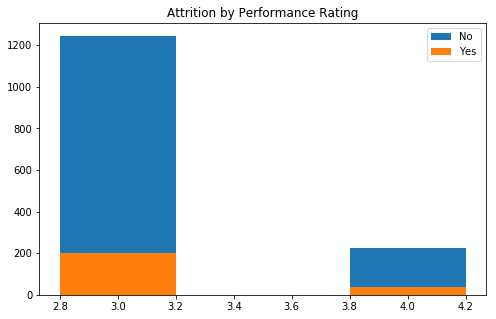

In [199]:
plt.figure(figsize = (8, 5))
plt.title('Attrition by Performance Rating')
plt.bar(PerformRate, New['Row'][0:2], bottom = New['Row'][2:4], width = 0.4, label = 'No')
plt.bar(PerformRate, New['Row'][2:4], width = 0.4, label = 'Yes')
plt.legend()

In [200]:
RelationSatisfy = employee['RelationshipSatisfaction'].unique()
New = employee.groupby(['Attrition', 'RelationshipSatisfaction']).count()
New

Age  BusinessTravel  DailyRate  \
Attrition RelationshipSatisfaction                                   
No        1                         219             219        219   
          2                         258             258        258   
          3                         388             388        388   
          4                         368             368        368   
Yes       1                          57              57         57   
          2                          45              45         45   
          3                          71              71         71   
          4                          64              64         64   

                                    Department  DistanceFromHome  Education  \
Attrition RelationshipSatisfaction                                            
No        1                                219               219        219   
          2                                258               258        258   
          3                                388               388        388   
          4                                368               368        368   
Yes       1                                 57                57         57   
          2                                 45                45         45   
          3                                 71                71         71   
          4                                 64                64         64   

                                    EducationField  EmployeeCount  \
Attrition RelationshipSatisfaction                                  
No        1                                    219            219   
          2                                    258            258   
          3                                    388            388   
          4                                    368            368   
Yes       1                                     57             57   
          2                                     45             45   
          3                                     71             71   
          4                                     64             64   

                                    EmployeeNumber  EnvironmentSatisfaction  \
Attrition RelationshipSatisfaction                                            
No        1                                    219                      219   
          2                                    258                      258   
          3                                    388                      388   
          4                                    368                      368   
Yes       1                                     57                       57   
          2                                     45                       45   
          3                                     71                       71   
          4                                     64                       64   

                                   ...   StockOptionLevel  TotalWorkingYears  \
Attrition RelationshipSatisfaction ...                                         
No        1                        ...                219                219   
          2                        ...                258                258   
          3                        ...                388                388   
          4                        ...                368                368   
Yes       1                        ...                 57                 57   
          2                        ...                 45                 45   
          3                        ...                 71                 71   
          4                        ...                 64                 64   

                                    TrainingTimesLastYear  WorkLifeBalance  \
Attrition RelationshipSatisfaction                                           
No        1                                           219              219   
          2                

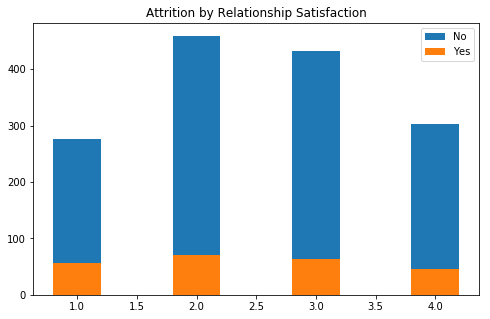

In [201]:
plt.figure(figsize = (8, 5))
plt.title('Attrition by Relationship Satisfaction')
plt.bar(RelationSatisfy, New['Row'][0:4], bottom = New['Row'][4:8], width = 0.4, label = 'No')
plt.bar(RelationSatisfy, New['Row'][4:8], width = 0.4, label = 'Yes')
plt.legend()

In [23]:
X.columns, len(X.columns)

(Index(['BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
        'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
        'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
        'AgeBracket'],
       dtype='object'), 26)

In [24]:
#Categorical columns to use are PerformanceRating, AgeBracket, MaritalStatus, JobLevel, Gender, Education, Department

#trial1 = X.drop(columns=['EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction', 'OverTime', 'RelationshipSatisfaction', 'Row'])
#trial2 = X.drop(columns=['EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction', 'OverTime', 'RelationshipSatisfaction',
#                        'NumCompaniesWorked']) # No. of false negatives increased compared to trial1
#trial3 = X.drop(columns=['EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction', 'OverTime', 'RelationshipSatisfaction',
#                        'YearsWithCurrManager']) # No much change in the num of false negaives compared to trial1
#trial4 = X.drop(columns=['EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction', 'OverTime', 'RelationshipSatisfaction',
 #                       'YearsWithCurrManager', 'YearsSinceLastPromotion']) # No. of false negatives increased compared to trial1
#trial5 = X.drop(columns=['EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction', 'OverTime', 'RelationshipSatisfaction',
  #                      'YearsWithCurrManager', 'HourlyRate']) # Precision has decreased, but recall has imporved compared to trial1
#trial6 = X.drop(columns=['EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction', 'OverTime', 'RelationshipSatisfaction',
   #                     'YearsWithCurrManager', 'HourlyRate', 'MonthlyIncome']) # Recall has improved greatly
#trial7 = X.drop(columns=['EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction', 'OverTime', 'RelationshipSatisfaction',
   #                     'YearsWithCurrManager', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike']) # False negatives improved compared to trail 6 
#trial8 = X.drop(columns=['EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction', 'OverTime', 'RelationshipSatisfaction',
   #                     'YearsWithCurrManager', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion'])
                        # No change compared to trial7
#trial9 = X.drop(columns=['EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction', 'OverTime', 'RelationshipSatisfaction',
   #                     'YearsWithCurrManager', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion',
   #                     'DistanceFromHome']) #False negatives grew worse compared to trial7
#trial10 = X.drop(columns=['EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction', 'OverTime', 'RelationshipSatisfaction',
  #                      'YearsWithCurrManager', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion',
  #                       'YearsAtCompany'])  #False negatives 141 remains same as trial6
#trial11 = X.drop(columns=['EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction', 'OverTime', 'RelationshipSatisfaction',
  #                      'YearsWithCurrManager', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion',
  #                      'YearsAtCompany', 'AgeBracket']) # False negatives 147 grew worse
#trial12 = X.drop(columns=['EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction', 'RelationshipSatisfaction',
 #                     'YearsWithCurrManager', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion',
 #                       'YearsAtCompany']) # False negatives 121 greatly improved.  Precision-Recall curve shows good performance untill recall 0.6
#trial13 = X.drop(columns=['JobInvolvement','JobSatisfaction', 'RelationshipSatisfaction',
 #                     'YearsWithCurrManager', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion',
 #                       'YearsAtCompany']) # False negatives 112 greatly improved.  Precision-Recall curve shows good performance untill recall 0.6
#trial14 = X.drop(columns=['JobInvolvement','JobSatisfaction','YearsWithCurrManager', 'HourlyRate', 'MonthlyIncome', 
   #                       'PercentSalaryHike', 'YearsSinceLastPromotion', 'YearsAtCompany']) # False negatives became 114
#trial15 = X.drop(columns=['JobInvolvement', 'RelationshipSatisfaction',
 #                     'YearsWithCurrManager', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion',
 #                       'YearsAtCompany'])  # False negatives 108 greatly improved.  Precision-Recall curve shows good performance untill and slightly beyond recall 0.6
#trial16 = X.drop(columns=['Gender', 'JobInvolvement', 'RelationshipSatisfaction',
#                      'YearsWithCurrManager', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion',
#                        'YearsAtCompany']) # False negatives 104 improved. Precision-Recall curve shows good performance untill recall 0.6

#trial17 = X.drop(columns=['Gender', 'RelationshipSatisfaction',
 #                   'YearsWithCurrManager', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion',
  #                      'YearsAtCompany']) # False negatives 101 imporved.  Precision-Recall curve shows good performance untill and a little beyond recall 0.6. Precision stays at 1 untill recall=0.2
#trial18 = X.drop(columns=['Gender', 'RelationshipSatisfaction',
 #                      'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion',
 #                      'YearsAtCompany', 'Row'])#False negatives 99 improved.  Precision-Recall curve shows good performance untill recall=0.7
                            # Precion is stays at 1 untill recall=0.2 and above 0.9 for recall between 0.2 and 0.3
#trial19 = X.drop(columns=['Gender', 'RelationshipSatisfaction',
 #                      'HourlyRate', 'PercentSalaryHike', 'YearsSinceLastPromotion',
 #                       'YearsAtCompany']) # False negatives increases to 111
#trial20 = X.drop(columns=['Gender', 'RelationshipSatisfaction',
 #                      'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike',
 #                       'YearsAtCompany']) # False negatives is 102

#trial21 = X.drop(columns=['Gender', 'RelationshipSatisfaction',
 #                    'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion',
  #                     'YearsAtCompany', 'Row']) #Included WorkLifeBalance as a feature.  Num of false negatives became 98
        
#trial22 = X.drop(columns=['Gender', 'RelationshipSatisfaction',
 #                     'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion',
 #                     'YearsAtCompany', 'Department']) #Num of false negatives became 103.  Performance of precision-recall curve worsened

#trial23 = X.drop(columns=['Gender', 'RelationshipSatisfaction',
 #                    'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion',
  #                   'YearsAtCompany', 'Row'])# Included JobRole as a feature.  Num of false negatives became 93.  Precion-recall curve performs well untill values close to recall=0.8

#trial24 = X.drop(columns=['Gender', 'RelationshipSatisfaction',
 #                     'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion',
 #                     'YearsAtCompany'])# Included EducationField as a feature. This produced the same results as in trial23                      

#trial25 = X.drop(columns=['Gender', 'RelationshipSatisfaction',
 #                     'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion',
 #                     'YearsAtCompany'])# Removed EducationField as a feature. Included YearsInCurrentRole as a feature. This produced the same results as in trial23 

#trial26 = X.drop(columns=['Gender', 'RelationshipSatisfaction',
  #                'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion',
   #               'YearsAtCompany', 'Row']) #Removed YearsInCurrentRole as a feature.  Added BusinessTravel as a feature.  Num of false positives is 91.  Precision-recall curve is greately improved

#trial27 = X.drop(columns=['Gender', 'RelationshipSatisfaction',
 #                     'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion',
  #                    'YearsAtCompany', 'Row']) #Added StockOptionLevel as a feature.  Num of false negatives became 87.  Precision-recall curve show a lot of improvement
#trial28 = X.drop(columns=['Gender', 'RelationshipSatisfaction',
   #                   'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion',
   #                   'YearsAtCompany']) #Added StandardHours as a feature.  Result is same as trial27
trial29 = X.drop(columns=['Gender', 'RelationshipSatisfaction',
                      'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion',
                      'YearsAtCompany']) #Removed StandardHours, included TrainingTimesLastYear. Num of false negatives reduced to 83

X_long = trial29

In [25]:
X_long.columns, len(X_long.columns)

(Index(['BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole',
        'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime',
        'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
        'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsWithCurrManager',
        'AgeBracket'],
       dtype='object'), 19)

In [879]:
X_long_onehot = X_long.copy()
X_long_onehot = pd.get_dummies(X_long_onehot, columns=['Education', 'Department', 
                                                       'JobLevel', 'PerformanceRating', 'AgeBracket', 'OverTime',
                                                       'EnvironmentSatisfaction', 'JobSatisfaction', 'JobInvolvement',
                                                       'MaritalStatus','WorkLifeBalance', 'JobRole','BusinessTravel',
                                                      'StockOptionLevel','TrainingTimesLastYear'], 
                               prefix = ['edu', 'dep', 'jlevel', 'rating', 'age', 'ot', 'env', 'jsatis', 'jinvol',
                                         'mstatus','wrklfe', 'jrole', 'busi', 'stock', 'train'])

X_long_onehot.head(3)

,DistanceFromHome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsWithCurrManager,edu_1,edu_2,edu_3,edu_4,edu_5,...,stock_1,stock_2,stock_3,train_0,train_1,train_2,train_3,train_4,train_5,train_6
0,1,8,11,8,5,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,8,1,23,10,7,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,2,6,15,7,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [880]:
longTrainX = X_long_onehot.values[0:1000]
trainY = Y.values[0:1000]
longTrainX[0:5], trainY[0:5]

(array([[ 1,  8, 11,  8,  5,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
          0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,
          1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  1,  0,
          0,  0,  1,  0,  0,  0,  0,  0,  0],
        [ 8,  1, 23, 10,  7,  1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,
          0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,
          0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,
          1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1,
          0,  0,  0,  0,  0,  1,  0,  0,  0],
        [ 2,  6, 15,  7,  0,  0,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,
          0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
          0,  0,  1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,
          1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,
          0,  0,  0,  0,  0,  1,

In [135]:
# Selecting only numerical data fields and creating a data frame

X_short = X.drop(columns=['Department', 'Education', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'AgeBracket'])

In [26]:
X_short.head(5)

,DistanceFromHome,HourlyRate,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,94,5993,8,11,8,6,0,5
1,8,61,5130,1,23,10,10,1,7
2,2,92,2090,6,15,7,0,0,0
3,3,56,2909,1,11,8,8,3,0
4,2,40,3468,9,12,6,2,2,2


In [258]:
# Defining trainX and trainY from selected numerical data fields

trainX = X_short.values[0:1000]
trainY = Y.values[0:1000]
trainX[0:5], trainY[0:5]

(array([[   1,   94, 5993,    8,   11,    8,    6,    0,    5],
        [   8,   61, 5130,    1,   23,   10,   10,    1,    7],
        [   2,   92, 2090,    6,   15,    7,    0,    0,    0],
        [   3,   56, 2909,    1,   11,    8,    8,    3,    0],
        [   2,   40, 3468,    9,   12,    6,    2,    2,    2]],
       dtype=int64), array(['Yes', 'No', 'Yes', 'No', 'No'], dtype=object))

In [881]:
# Initialzing logistic regression model and fitting the model to train data

logisticRegr = LogisticRegression()
logisticRegr.fit(longTrainX, trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [882]:
# Obtaining predictions for train data from the model
# Obtaining true-false probabilities for train data from the model 
# Obtaining model score, which is equal to the number of accurate predictions

trainYpred = logisticRegr.predict(longTrainX)
trainYprob = logisticRegr.predict_proba(longTrainX)
score = logisticRegr.score(longTrainX, trainY)
#trainYpred[0:20], score, trainYprob[0:20]
score

0.897

In [708]:
logisticRegr.coef_

array([[ 4.20179217e-02,  1.57638043e-01, -4.64841583e-02,
        -5.72293952e-02,  2.66949071e-04,  2.98956826e-02,
         6.94308858e-02,  1.39944516e-01,  1.71950310e-01,
        -7.55914884e-01, -7.54451583e-02, -4.64416615e-01,
         1.95168285e-01,  2.33185037e-01, -1.10316498e+00,
         1.26176618e-01, -3.00657916e-01,  6.99767750e-01,
        -1.55645298e-02, -3.29128959e-01,  9.16538139e-01,
         1.57213032e-01,  3.25719265e-01, -1.05501578e-01,
        -4.14607581e-01, -5.90960761e-01, -2.67137978e-01,
        -1.43710199e-01, -2.22245829e-01, -1.15922440e+00,
         8.14530910e-01,  7.08247685e-01, -8.40581006e-02,
        -4.15718824e-01, -5.53164250e-01,  5.23298858e-01,
        -2.34411047e-01,  9.55230339e-02, -7.29104334e-01,
         1.11081756e+00, -9.74738181e-02, -3.52610871e-01,
        -1.00542636e+00,  6.43057911e-01, -9.49811126e-02,
        -6.63844180e-01, -2.28926107e-01,  4.13556665e-02,
         3.22185178e-02,  7.63387454e-01, -2.89707249e-0

In [634]:
logit = sm.Logit(trainYchange, longTrainX)
result = logit.fit()
result.summary2()

         Current function value: 0.284242
         Iterations: 35


C:\Users\VEENA\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VEENA\Anaconda3\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
C:\Users\VEENA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\VEENA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\VEENA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                 Logit              No. Iterations:     35.0000 
Dependent Variable:    y                  Pseudo R-squared:   0.370   
Date:                  2019-04-02 14:33   AIC:                668.4837
No. Observations:      1000               BIC:                913.8715
Df Model:              49                 Log-Likelihood:     -284.24 
Df Residuals:          950                LL-Null:            -451.10 
Converged:             0.0000             Scale:              1.0000  
----------------------------------------------------------------------
     Coef.      Std.Err.      z    P>|z|      [0.025         0.975]   
----------------------------------------------------------------------
x1    0.0441        0.0135  3.2569 0.0011         0.0176        0.0707
x2    0.1764        0.0472  3.7386 0.0002         0.0839        0.2689
x3   -0.0376        0.0333 -1.1308 0.2582        -0.1029        0.0276
x4   -0.0733        0.0420 -1.7434 0.0813        -0.1557        0.0091
x5    0.0003        0.0004  0.7778 0.4367        -0.0005        0.0010
x6   -0.1039  6066079.0446 -0.0000 1.0000 -11889296.5587 11889296.3509
x7   -0.1292  6954566.8530 -0.0000 1.0000 -13630700.6892 13630700.4308
x8   -0.0780  7865622.4367 -0.0000 1.0000 -15416336.7698 15416336.6139
x9    0.0369  6806757.4799  0.0000 1.0000 -13340999.4753 13340999.5491
x10  -1.3626  6999874.0391 -0.0000 1.0000 -13719502.3755 13719499.6504
x11 -12.4412  6274943.5428 -0.0000 1.0000 -12298675.7900 12298650.9077
x12   5.5560  1753728.7225  0.0000 1.0000  -3437239.5789  3437250.6908
x13   5.2485  6518635.6774  0.0000 1.0000 -12776285.9075 12776296.4044
x14  -0.6087  6664439.2108 -0.0000 1.0000 -13062061.4390 13062060.2216
x15  -1.8695  5144927.3141 -0.0000 1.0000 -10083874.1083 10083870.3693
x16  -0.3003  5646037.6873 -0.0000 1.0000 -11066030.8227 11066030.2221
x17  -0.5559  4385014.9682 -0.0000 1.0000  -8594471.9652  8594470.8533
x18   1.6977  5958723.2943  0.0000 1.0000 -11678881.3530 11678884.7484
x19  -1.2555  2955983.1602 -0.0000 1.0000  -5793621.7885  5793619.2775
x20  -0.6625  2583500.7969 -0.0000 1.0000  -5063569.1785  5063567.8535
x21   0.2813  2820380.1721  0.0000 1.0000  -5527843.2787  5527843.8412
x22  -0.6710           nan     nan    nan            nan           nan
x23  -0.9657           nan     nan    nan            nan           nan
x24   1.1265  6732579.6180  0.0000 1.0000 -13195612.4479 13195614.7009
x25   0.1051  6871872.2053  0.0000 1.0000 -13468621.9236 13468622.1337
x26   0.3607  7757724.9726  0.0000 1.0000 -15204861.1877 15204861.9090
x27  -0.1915  6550131.9546 -0.0000 1.0000 -12838022.9165 12838022.5334
x28  -0.5943  5162476.1751 -0.0000 1.0000 -10118267.9686 10118266.7800
x29  -0.8274 10039145.6223 -0.0000 1.0000 -19676364.6827 19676363.0278
x30  -0.5240  3528942.5017 -0.0000 1.0000  -6916600.7308  6916599.6829
x31  -0.7140  7664959.6213 -0.0000 1.0000 -15023045.5147 15023044.0866
x32  -0.3777  9121636.7152 -0.0000 1.0000 -17878079.8195 17878079.0642
x33  -1.8893           nan     nan    nan            nan           nan
x34   0.2525           nan     nan    nan            nan           nan
x35   0.4878           nan     nan    nan            nan           nan
x36  -0.4111           nan     nan    nan            nan           nan
x37  -0.7795           nan     nan    nan            nan           nan
x38  -0.9339           nan     nan    nan            nan           nan
x39   0.2588  3470653.2096  0.0000 1.0000  -6802355.0347  6802355.5524
x40  -0.5756  4505853.6074 -0.0000 1.0000  -8831311.3657  8831310.2145
x41  -0.1517  4775379.8925 -0.0000 1.0000  -9359572.7535  9359572.4502
x42  -1.1683  4574563.6580 -0.0000 1.0000  -8965981.1829  8965978.8464
x43   1.0051           nan     nan    nan            nan           nan
x44  -0.4882           nan     nan    nan            nan           nan
x45

In [883]:
# Creating a confusion matrix for the train data 

cm = confusion_matrix(trainY, trainYpred, labels = ['No', 'Yes'])
cm

array([[813,  20],
       [ 83,  84]], dtype=int64)

In [303]:
# Extracting the four quadrants of the confusion matrix

tn, fp, fn, tp = confusion_matrix(trainY, trainYpred).ravel()
tn, fp, fn, tp

(821, 12, 148, 19)

In [279]:
841/len(trainY)

0.841

In [884]:
# Printing the classification report for train data

print(classification_report(trainY, trainYpred))

             precision    recall  f1-score   support

         No       0.91      0.98      0.94       833
        Yes       0.81      0.50      0.62       167

avg / total       0.89      0.90      0.89      1000



In [885]:
# Extracting the probabilities for true (yes) 

probs = trainYprob[:, 1]
probs[0:10], trainY[0:10]

(array([0.77831111, 0.00301804, 0.72029733, 0.33294925, 0.2624058 ,
        0.14467643, 0.33797746, 0.0924217 , 0.06786682, 0.02884638]),
 array(['Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
       dtype=object))

In [886]:
# Replacing Yes/No in train data with 1/0

attrition={'Yes':1, 'No':0}
trainYchange = [attrition[item] for item in trainY]
trainY[0:10], trainYchange[0:10]

(array(['Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
       dtype=object), [1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [887]:
# Obtaining precision and recall for different thresholds

precision, recall, threshold = precision_recall_curve(trainYchange, probs)

In [805]:
#precision, recall, threshold, len(threshold)

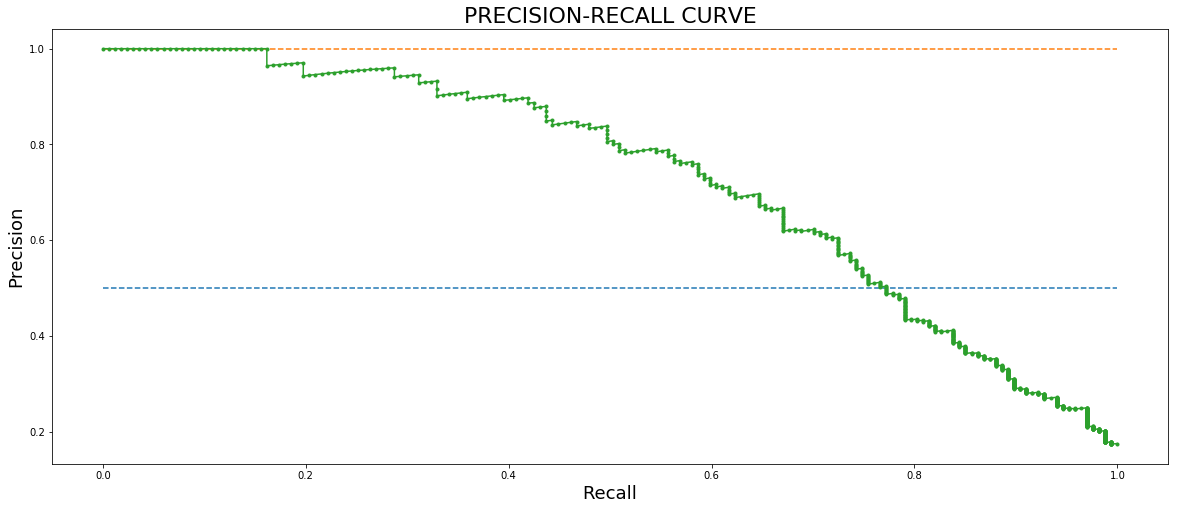

In [888]:
# Plotting the precision recall curve

plt.figure(figsize = (20, 8))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot([0, 1], [1, 1], linestyle = '--')
plt.plot(recall, precision, marker='.')
plt.title('PRECISION-RECALL CURVE', fontsize = 22)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.show()

In [230]:
len(trainY)

1470

In [889]:
#Selecting test data
longTestX = X_long_onehot.values[1000:1470]
testY = Y.values[1000:1470]
longTestX[0:5], testY[0:5]

(array([[ 8,  9, 13, 12,  4,  0,  0,  0,  1,  0,  0,  1,  0,  1,  0,  0,
          0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,
          0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  1,  0,
          0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,
          0,  0,  0,  0,  1,  0,  0,  0,  0],
        [11,  4, 18,  8,  2,  0,  0,  1,  0,  0,  0,  1,  0,  1,  0,  0,
          0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,
          0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,
          1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  1],
        [18,  2, 11, 10,  2,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  1,
          0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,
          0,  1,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,
          1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
          0,  0,  0,  0,  1,  0,

In [890]:
# Obtaining predictions for test data from the model
# Obtaining true-false probabilities for test data from the model 
# Obtaining model score, which is equal to the number of accurate predictions

testYpred = logisticRegr.predict(longTestX)
testYprob = logisticRegr.predict_proba(longTestX)
testscore = logisticRegr.score(longTestX, testY)
#trainYpred[0:20], score, trainYprob[0:20]
testscore

0.8872340425531915

In [891]:
cmTest = confusion_matrix(testY, testYpred, labels = ['No', 'Yes'])
cmTest

array([[383,  17],
       [ 36,  34]], dtype=int64)

In [892]:
# Printing the classification report for test data

print(classification_report(testY, testYpred))

             precision    recall  f1-score   support

         No       0.91      0.96      0.94       400
        Yes       0.67      0.49      0.56        70

avg / total       0.88      0.89      0.88       470



In [893]:
# Extracting the probabilities for true (yes) in test data

probstest = testYprob[:, 1]
probstest[0:10], testY[0:10]

(array([0.64195361, 0.4876085 , 0.06782702, 0.15178617, 0.099003  ,
        0.42692009, 0.34347156, 0.34074793, 0.00474032, 0.02062036]),
 array(['No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No'],
       dtype=object))

In [894]:
# Replacing Yes/No in test data with 1/0

attrition={'Yes':1, 'No':0}
testYchange = [attrition[item] for item in testY]
testY[0:10], testYchange[0:10]

(array(['No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No'],
       dtype=object), [0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [895]:
# Obtaining precision and recall on test data for different thresholds 

precisionTest, recallTest, thresholdTest = precision_recall_curve(testYchange, probstest)

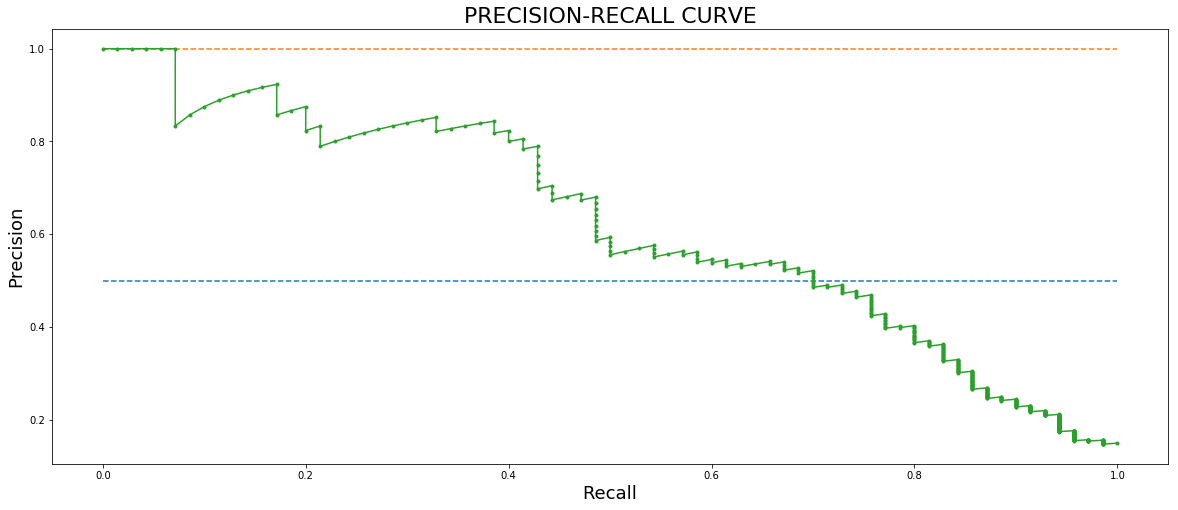

In [896]:
# Plotting the precision recall curve for test data

plt.figure(figsize = (20, 8))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot([0, 1], [1, 1], linestyle = '--')
plt.plot(recallTest, precisionTest, marker='.')
plt.title('PRECISION-RECALL CURVE', fontsize = 22)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.show()

In [53]:
# Label encoding categorical data
le = preprocessing.LabelEncoder()
categorical = X_long[['Education', 'Department', 
                                                       'JobLevel', 'PerformanceRating', 'AgeBracket', 'OverTime',
                                                       'EnvironmentSatisfaction', 'JobSatisfaction', 'JobInvolvement',
                                                       'MaritalStatus','WorkLifeBalance', 'JobRole','BusinessTravel',
                                                      'StockOptionLevel','TrainingTimesLastYear']] 
numerical = X_long.drop(columns = ['Education', 'Department', 
                                                       'JobLevel', 'PerformanceRating', 'AgeBracket', 'OverTime',
                                                       'EnvironmentSatisfaction', 'JobSatisfaction', 'JobInvolvement',
                                                       'MaritalStatus','WorkLifeBalance', 'JobRole','BusinessTravel',
                                                      'StockOptionLevel','TrainingTimesLastYear'])
categoricalEncoded = categorical.apply(le.fit_transform)
XTree = pd.concat([numerical, categoricalEncoded], axis = 1)

In [54]:
#Creating train dataset and using decision tree for training

XTreeTrain = XTree[0:1000]
YTreeTrain = Y[0:1000]

XTreeTrain.columns

Index(['DistanceFromHome', 'NumCompaniesWorked', 'TotalWorkingYears',
       'YearsWithCurrManager', 'Education', 'Department', 'JobLevel',
       'PerformanceRating', 'AgeBracket', 'OverTime',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'JobInvolvement',
       'MaritalStatus', 'WorkLifeBalance', 'JobRole', 'BusinessTravel',
       'StockOptionLevel', 'TrainingTimesLastYear'],
      dtype='object')

In [55]:
clf = tree.DecisionTreeClassifier()
clf.fit(XTreeTrain, YTreeTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
#Creating test dataset
XTreeTest = XTree[1000:1470]
YTreeTest = Y[1000:1470]

In [60]:
#Using decision tree model to get prediction for test dataset

YTreeTestPredict = clf.predict(XTreeTest)
YTreeTrainPredict = clf.predict(XTreeTrain)

In [62]:
#Getting a confusion matrix

cmTreeTest = confusion_matrix(YTreeTest, YTreeTestPredict, labels = ['No', 'Yes'])
cmTreeTrain = confusion_matrix(YTreeTrain, YTreeTrainPredict, labels = ['No', 'Yes'])
cmTreeTest

array([[352,  48],
       [ 49,  21]], dtype=int64)